In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

from stabilogram.stato import Stabilogram
from descriptors import compute_all_features



ModuleNotFoundError: No module named 'swarii'

In [ ]:
forceplate_file_selected = "test.csv"

In [2]:
data_forceplatform = pd.read_csv(forceplate_file_selected,header=[31],sep=",",index_col=0)
data_forceplatform.head()

NameError: name 'forceplate_file_selected' is not defined

In [5]:
dft = data_forceplatform
X = dft.get(" My")/dft.get(" Fz")
Y = dft.get(' Mx')/ dft.get(' Fz')
X = X - np.mean(X)
Y = Y - np.mean(Y)
X = 100*X
Y = 100*Y

X = X.to_numpy()[4000:7000]
Y= Y.to_numpy()[4000:7000]

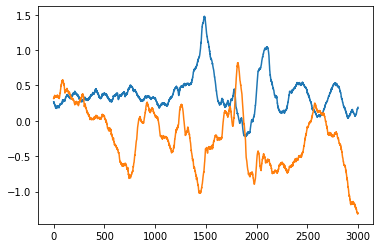

In [6]:
plt.plot(X)
plt.plot(Y)

In [7]:
data = np.array([X,Y]).T


In [8]:
valid_index = (np.sum(np.isnan(data),axis=1) == 0)
print(np.sum(valid_index),len(data))


3000 3000


In [9]:
stato = Stabilogram()
stato.from_array(array=data, original_frequency=100)

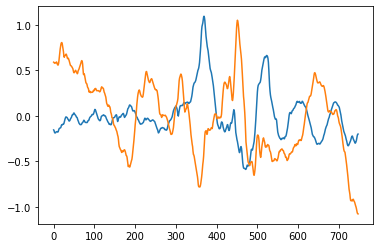

In [10]:
plt.plot(stato.medio_lateral)
plt.plot(stato.antero_posterior)

In [11]:
features = compute_all_features(stato)

In [12]:
features

{'mean_value_ML': 0.00022477811286917337,
 'mean_value_AP': -0.001808882526784325,
 'maximum_value_ML': 1.0934116824820324,
 'maximum_value_AP': 1.0760854903981534,
 'maximum_value_Radius': 1.1715638528570644,
 'mean_distance_ML': 0.17958109553112522,
 'mean_distance_AP': 0.34804323313894586,
 'mean_distance_Radius': 0.4254325412234754,
 'RMS_ML': 0.26540984939429485,
 'RMS_AP': 0.4164844164729688,
 'RMS_Radius': 0.49386400690912025,
 'amplitude_ML': 1.6807988285326023,
 'amplitude_AP': 2.125676504433462,
 'amplitude_ML_AND_AP': 2.1272550639100785,
 'Quotient_both_direction_ML_AND_AP': 0.7907124273270222,
 'sway_length_ML': 10.71708562172667,
 'sway_length_AP': 15.570111593699238,
 'sway_length_ML_AND_AP': 20.80537378260378,
 'confidence_ellipse_area_ML_AND_AP': 2.08357482747723,
 'length_over_area_ML_AND_AP': 9.98542193360759,
 'Coefficient_sway_direction_ML_AND_AP': 0.005998238374447,
 'planar_deviation_ML_AND_AP': 0.4938606430351945,
 'fractal_dimension_cc_ML_AND_AP': 1.614539469234